In [ ]:
Цель: "similarity sentences", найти и сопоставить разные по написанию, но одинаковые по смыслу предложения
Задачи:
    1. провести очистку данных от символов, регистра, убрать предложения, состоящие из пары слов(оптимизация)
    (пока для одной колонки, самой инфорнмативной "body_text")
    2. обучить модель bert на очищенных данных и сопоставить предложения с помощью cousine similarity
    3. визуализировать полученные результаты

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("D:\\wikibooks dataset\\ru-books-dataset.csv")#поменять адресс
df.head()

,title,url,abstract,body_text,body_html
0,Викиучебник: Техника и технология средств масс...,https://ru.wikibooks.org/wiki/%D0%A2%D0%B5%D1%...,* [станция|Рабочая станция];,Рабочая станция;\nСервер;\nПерсональный компью...,"<div class=""mw-parser-output""><ul><li><a href=..."
1,Викиучебник: АОН/Пилотское свидетельство,https://ru.wikibooks.org/wiki/%D0%90%D0%9E%D0%...,Гражданское пилотское свидетельство - разрешен...,В Википедии имеется статья по теме «Свидетельс...,"<div class=""mw-parser-output""><div class=""info..."
2,Викиучебник: Книга программиста/Структуры данн...,https://ru.wikibooks.org/wiki/%D0%9A%D0%BD%D0%...,К оглавлению,"К оглавлению\nВсе программы, код которых вылож...","<div class=""mw-parser-output""><p><a href=""/wik..."
3,Викиучебник: Тесты НМО/Гигиенические основы и ...,https://ru.wikibooks.org/wiki/%D0%A2%D0%B5%D1%...,Гигиенические основы и медицинский контроль за...,Гигиенические основы и медицинский контроль за...,"<div class=""mw-parser-output""><p><b>Гигиеничес..."
4,Викиучебник: Коктейли/Пенная фея,https://ru.wikibooks.org/wiki/%D0%9A%D0%BE%D0%...,Пенная фея,Пенная фея\n\nДжин Old Tom — 60 г\nАбсент — 15...,"<div class=""mw-parser-output""><p><b>Пенная фея..."


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7898 entries, 0 to 7897
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      7898 non-null   object
 1   url        7898 non-null   object
 2   abstract   7840 non-null   object
 3   body_text  7880 non-null   object
 4   body_html  7898 non-null   object
dtypes: object(5)
memory usage: 308.6+ KB


In [4]:
df.shape

(7898, 5)

In [5]:
df.isnull()

,title,url,abstract,body_text,body_html
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
7893,False,False,False,False,False
7894,False,False,False,False,False
7895,False,False,False,False,False
7896,False,False,True,True,False


In [3]:
data = df[[ "title", "abstract", "body_text"]] #убрать ненужные колонки

data.head()


,title,abstract,body_text
0,Викиучебник: Техника и технология средств масс...,* [станция|Рабочая станция];,Рабочая станция;\nСервер;\nПерсональный компью...
1,Викиучебник: АОН/Пилотское свидетельство,Гражданское пилотское свидетельство - разрешен...,В Википедии имеется статья по теме «Свидетельс...
2,Викиучебник: Книга программиста/Структуры данн...,К оглавлению,"К оглавлению\nВсе программы, код которых вылож..."
3,Викиучебник: Тесты НМО/Гигиенические основы и ...,Гигиенические основы и медицинский контроль за...,Гигиенические основы и медицинский контроль за...
4,Викиучебник: Коктейли/Пенная фея,Пенная фея,Пенная фея\n\nДжин Old Tom — 60 г\nАбсент — 15...


In [10]:
print(data["body_text"][1:2].value_counts())

В Википедии имеется статья по теме «Свидетельство частного пилота»\n\n\nГражданское пилотское свидетельство - разрешение на управление определенным видом воздушного судна. Внутри этого свидетельства может быть много разных отметок (а может и не быть), которые или урезают или увеличивают количество разрешенных функций. Самое понятное и известное массам это свидетельство частного пилота. Его выдают после обучения на самолете или на вертолете. Для краткости в разговорной речи это свидетельство могут обозначать через название его иностранного аналога - ППЛ или ПиПиЭль (PPL).  Раньше это свидетельство в России называлось свидетельство пилота-любителя.\nПорядок выдачи свидетельств описан в ФАП-147. Содержимое этого документа почти целиком повторяет Приложение 1 "Выдача свидетельств авиационному персоналу" к Чикагской конвенции. За исключением того что свидетельства СВС в нем нет и это российская особенность.\nПилотские в каждой стране являются национальными. Выдает их CAA. В разных странах э

In [4]:
print(len(data["body_text"]))

7898


In [ ]:
Очистка данных

In [103]:
import re
import string
def clear_text(text):
    cleaned = re.sub(r"(\\n|\n|\r)", "", text) # expected string or bytes-like object
    cleaned = re.sub(r"\s{2,}", "", cleaned)
    cleaned = re.sub(r"[a-zA-Z0-9]", "", cleaned)
    
    cleaned = re.sub('\[[^]]*\]', '', cleaned)
    
    lower = cleaned.lower()
    sentences = re.split('\.', lower) #если различать точки как окончание предложений,
    
    
    if len(sentences) < 5:
        return ""
        
        #убрав сокращения, то можно повысить точность 
    return list(filter(None, sentences))

d = [ clear_text(str(row)) for row in data["body_text"]]
     
flat_list = [item for sublist in d for item in sublist]
print(flat_list)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [107]:
flat_list = [] #циклы для перехода к виду ["...", "..."] вместо [["..."], ["..."]]
for sublist in d:
    for item in sublist:
        flat_list.append(item)

In [108]:
flat_list

['в википедии имеется статья по теме «свидетельство частного пилота»гражданское пилотское свидетельство - разрешение на управление определенным видом воздушного судна',
 ' внутри этого свидетельства может быть много разных отметок (а может и не быть), которые или урезают или увеличивают количество разрешенных функций',
 ' самое понятное и известное массам это свидетельство частного пилота',
 ' его выдают после обучения на самолете или на вертолете',
 ' для краткости в разговорной речи это свидетельство могут обозначать через название его иностранного аналога - ппл или пипиэль ()',
 'раньше это свидетельство в россии называлось свидетельство пилота-любителя',
 'порядок выдачи свидетельств описан в фап-',
 ' содержимое этого документа почти целиком повторяет приложение  "выдача свидетельств авиационному персоналу" к чикагской конвенции',
 ' за исключением того что свидетельства свс в нем нет и это российская особенность',
 'пилотские в каждой стране являются национальными',
 ' выдает их 

In [106]:
len(flat_list)

472804

In [ ]:
Загрузка модели bert

In [74]:
!pip install -U sentence-transformers

Requirement already up-to-date: sentence-transformers in c:\users\panao\anaconda3\lib\site-packages (2.1.0)


In [75]:
from sentence_transformers import SentenceTransformer, util #for paraphrase_mining
from tqdm import tqdm
from sklearn.metrics.pairwise import cosine_similarity

In [76]:
model = ('distiluse-base-multilingual-cased-v1')

In [ ]:
собственные данные

In [153]:
flat_listtt=[
    ' машина едет по дороге',
    ' автомобиль движется по проезжей части',
    ' деревня стоит у озера',
    
    ' студент закрывает сессию',
    ' учащийся сдает экзамен',
    ' политические силы и правозащитные организации начали генерировать мобилизации каждый год',
    ' действие фильма происходит в сказочном королевстве, жители которого готовятся к балу',
    ' клигер проработал в четырёх золотодобывающих артелях за свою жизнь',
]

In [154]:
%%time
paraphrases = util.paraphrase_mining(model, flat_listtt, top_k = 2)#[1000:3000]

id_1 = []
id_2 = []
scores = []


for paraphrase in tqdm(paraphrases):
    score, i, j = paraphrase
    id_1.append(flat_listtt[i])
    id_2.append(flat_listtt[j])
    scores.append(score)
    
index_df = pd.DataFrame({'id_1' : id_1,
                          'id_2' : id_2,
                          'score' : scores})   

100%|██████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<?, ?it/s]

Wall time: 171 ms


In [ ]:
загрузка wikibooks dataset

In [159]:
%%time
paraphrases = util.paraphrase_mining(model, flat_list[:5000], top_k = 2)#[1000:3000]

id_1 = []
id_2 = []
scores = []


for paraphrase in tqdm(paraphrases):
    score, i, j = paraphrase
    id_1.append(flat_list[i])
    id_2.append(flat_list[j])
    scores.append(score)
    #print("{} \t\t {} \t\t Score: {:.4f}".format(flat_list[i], flat_list[j], score))
index_df = pd.DataFrame({'id_1' : id_1,
                          'id_2' : id_2,
                          'score' : scores})    

100%|██████████████████████████████████████████████████████████████████████████| 8642/8642 [00:00<00:00, 787725.20it/s]

Wall time: 1min 47s


In [160]:
index_df.describe()#new

,score
count,8642.000000
mean,0.773585
std,0.233290
min,0.231872
25%,0.542856
50%,0.848836
75%,1.000000
max,1.000001


In [161]:
index_df.head(25)

,id_1,id_2,score
0,///,///,1.000001
1,///,///,1.000001
2,антонов а,антонов а,1.000001
3,глава,глава,1.000001
4,глава,глава,1.000001
5,глава,глава,1.000001
6,глава,глава,1.000001
7,глава,глава,1.000001
8,///,///,1.000001
9,;; (: );_ -=,;; (: );_ -=,1.000001


In [162]:
index_df[index_df["score"] < 0.8 ].head(25)

,id_1,id_2,score
4514,методики исследования нагляднообразного мышле...,"методики исследования внимания, процедура про...",0.799845
4515,"методики исследования внимания, процедура про...",методики исследования нагляднообразного мышле...,0.799845
4516,"методики исследования внимания, процедура про...",методики исследования нагляднообразного мышле...,0.799845
4517,"позаказный, попередельный и попроцессный мето...",попроцесный метод калькулирования себестоимос...,0.799774
4518,что такое сектор жёсткого диска?,для чего используется первый сектор жёсткого ...,0.799504
4519,# загружаем файл с бутсектором # необходимо д...,"(,) # устанавливаем корнем первый раздел перв...",0.799168
4520,номин,мн,0.799153
4521,номин,мн,0.799153
4522,();; ( : ): ; // выполняет склеивание списко...,") (, );; (: ): ; ;// возвращает перевёрнутый ...",0.799136
4523,или,или ///,0.798954


In [136]:
index_df.sample(frac=0.25)

,id_1,id_2,score
2508,проверено-- г,проверено-- г,1.000000
5619,есть второе решение,второй подход,0.619612
1648,-)/(-); = +(-)*(,-)/(-); = +(-)*(,1.000000
3160,"(); *= ;; /(, : ): ; :=",(); *= ;; /(: ; : ): ; :=,0.997945
5324,периоперационная кровопотеря и принципы инфузи...,клинические проявления и алгоритм лечения боле...,0.653417
...,...,...,...
5146,полученную величину увеличивают на % и суммир...,во время операции началось кровотечение из по...,0.678391
5687,", феофилов г",", äää",0.611547
3027,#=> ::=,#=> ::=,0.999999
5003,альтернативные системы учёта затрат,альтернативные системы учёта затратрасчёт себе...,0.698068


In [144]:
filter_large = index_df['score'] < 0.8
n = index_df.loc[filter_large]

In [146]:
n.head(30)

,id_1,id_2,score
4514,методики исследования нагляднообразного мышле...,"методики исследования внимания, процедура про...",0.799845
4515,"методики исследования внимания, процедура про...",методики исследования нагляднообразного мышле...,0.799845
4516,"методики исследования внимания, процедура про...",методики исследования нагляднообразного мышле...,0.799845
4517,"позаказный, попередельный и попроцессный мето...",попроцесный метод калькулирования себестоимос...,0.799774
4518,что такое сектор жёсткого диска?,для чего используется первый сектор жёсткого ...,0.799504
4519,# загружаем файл с бутсектором # необходимо д...,"(,) # устанавливаем корнем первый раздел перв...",0.799168
4520,номин,мн,0.799153
4521,номин,мн,0.799153
4522,();; ( : ): ; // выполняет склеивание списко...,") (, );; (: ): ; ;// возвращает перевёрнутый ...",0.799136
4523,или,или ///,0.798954


In [149]:
n.sample(frac=0.25)

,id_1,id_2,score
8497,"""выберите "" ""первая страница - это вступление,...",то же действие (скачивание) вы можете наблюда...,0.362792
8447,"литератураэндрю таненбаум, мартин ван стеен ра...",система кайзен-кост,0.373450
5933,частная фирма построена на экономическом конт...,причиной этой неэффективности бюрократии явля...,0.589860
6479,выгода для нашего простого примера может пока...,", но понять такой код было бы ещё сложнее",0.542922
8477,""" пули выбранное в таблицу рэнжей для обновлений",миссии для -режима ежедневно обновляются,0.367439
...,...,...,...
5747,структуры данных на базе статического массивап...,"простейшая очередь = ; = _: ;_, _: ;_: ; : ...",0.606884
5269,"кроме того маленькие ゃ я, ょ ё, ゅ ю используютс...",а для любой другой согласной нужно точно так ...,0.660075
8546,"каждая -миссия, кроме тренировки, делится на ...",состоит из двух секций: и в первой секции ка...,0.348747
5090,↑игровые валюты —,↑перчатки —,0.685201


<AxesSubplot:ylabel='Frequency'>

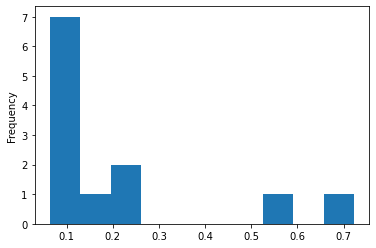

In [157]:
index_df["score"].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

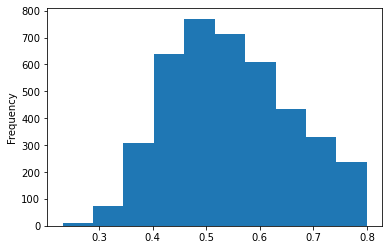

In [150]:
n["score"].plot(kind='hist')

In [ ]:
сохранение данных

In [158]:
index_df.to_csv('small_my_examples_sent_transf.csv')